<a href="https://colab.research.google.com/github/Shritej24c/HPE-DA/blob/main/Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jt -t monokai -tf droidsans -fs 14 -altp -tfs 14  -nfs 115 -cellw 98% -T

In [ ]:
!pip install --upgrade pip
!pip install numpy 
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
#Import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [ ]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = F

In [ ]:
df_og = pd.read_csv('2_data.csv')

In [ ]:
df_og.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
df_og['Ad Device'].unique()

array(['Tablets', 'Computers', 'Mobile', nan], dtype=object)

In [ ]:
df_og.loc[df_og["# Form Complete"] == 1,]

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
17771,7/18/2022,5,Engagement,875,Search,Channel Partner 5,Computers,3.0,NaN,Text,Audience Type 1,32,1353,640,0,0,0,6,0,0,1
26544,12/13/2022,3,Intent to Buy,918,Search,Channel Partner 5,Computers,18.0,NaN,Text,Audience Type 1,22,31,14,0,0,0,3,1,1,1
78284,10/8/2022,3,Engagement,875,Search,Channel Partner 5,Mobile,3.0,NaN,Text,Audience Type 1,7,296,160,0,0,0,1,0,0,1
120423,1/10/2023,5,Engagement,898,Search,Channel Partner 1,Mobile,31.0,NaN,Text,Audience Type 5,36,22,15,0,0,0,1,0,0,1
170885,2/13/2023,2,Engagement,22,Social,Channel Partner 2,NaN,NaN,67.0,Image,Audience Type 2,74,58,45,0,0,0,4,4,2,1
221451,8/9/2022,4,Engagement,876,Search,Channel Partner 1,Mobile,3.0,NaN,Text,Audience Type 1,27,50,40,0,0,0,1,0,0,1
349690,11/18/2022,2,Engagement,897,Search,Channel Partner 1,Computers,29.0,NaN,Text,Audience Type 1,10,48,20,0,0,0,1,0,0,1
366190,1/4/2023,3,Engagement,879,Search,Channel Partner 5,Mobile,28.0,NaN,Text,Audience Type 1,22,569,460,0,0,0,8,0,0,1
369278,2/14/2023,3,Consideration,914,Search,Channel Partner 5,Computers,9.0,NaN,Text,Audience Type 1,109,486,260,0,0,0,10,3,5,1


In [ ]:
pd.set_option('display.max_columns', None)
df_og.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
df_og.loc[df_og["# Form Complete"] == 1,"Ad Digital Channel"].unique()

array(['Search', 'Social'], dtype=object)

In [ ]:
df_og.loc[df_og["# Social Likes"] != 0,"Ad Digital Channel"].value_counts()

Social                  2883
Programmatic Display     222
Search                   215
Name: Ad Digital Channel, dtype: int64

In [ ]:
df_og.loc[df_og["# Web Visit"] != 0,"Ad Digital Channel"].value_counts()

Search                  14051
Programmatic Display     6650
Social                    322
Name: Ad Digital Channel, dtype: int64

In [ ]:
df_og.loc[df_og["# Collateral View"] != 0,"Ad Digital Channel"].value_counts()

Search                  2483
Programmatic Display    1249
Social                    45
Name: Ad Digital Channel, dtype: int64

In [ ]:
df_og.loc[df_og["# Product View"] != 0,"Ad Digital Channel"].value_counts()

Search                  3533
Programmatic Display     895
Social                    64
Name: Ad Digital Channel, dtype: int64

In [ ]:
df_og['$ Spend'].sum()

6702046

In [ ]:
df_og.loc[df_og['# Collateral View'] == 1,].groupby(['Ad Digital Channel']).count()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
Ad Digital Channel,,,,,,,,,,,,,,,,,,,,
Programmatic Display,526,526,526,526,526,0,0,424,525,526,526,526,526,526,526,526,526,526,526,526
Search,1077,1077,1077,1077,1077,1077,1077,0,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077
Social,20,20,20,20,20,0,0,14,20,20,20,20,20,20,20,20,20,20,20,20


In [ ]:
df_og.columns[:5]

Index(['Date', 'Campaign ID', 'Campaign Goal Code', 'Campaign Ad ID',
       'Ad Digital Channel'],
      dtype='object')

In [ ]:
camp1 = df_og.loc[df_og['Campaign ID'] == 1, ].sort_values(by = ['Date', 'Campaign ID', "Campaign Ad ID", "Ad Digital Channel"])

In [ ]:
len(camp1['Date'].unique())


226

In [ ]:
len(camp1['Campaign Ad ID'].unique())

426

In [ ]:
camp1['Ad Digital Channel'].value_counts()

Programmatic Display    43791
Search                  29229
Social                   6978
Name: Ad Digital Channel, dtype: int64

In [ ]:
camp1['Campaign Goal Code'].value_counts()

Engagement       74233
Awareness         3063
Consideration     2160
Purchase           524
Intent to Buy       18
Name: Campaign Goal Code, dtype: int64

In [ ]:
camp1.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
150521,1/1/2023,1,Engagement,32,Social,Channel Partner 2,NaN,NaN,15.0,Video,Audience Type 2,1,2,0,0,0,0,0,0,0,0
300794,1/1/2023,1,Engagement,34,Social,Channel Partner 2,NaN,NaN,18.0,Video,Audience Type 2,0,0,0,0,0,0,0,0,0,0
195114,1/1/2023,1,Engagement,35,Social,Channel Partner 2,NaN,NaN,18.0,Video,Audience Type 2,72,5158,0,0,0,0,0,0,0,0
34583,1/1/2023,1,Engagement,36,Social,Channel Partner 2,NaN,NaN,18.0,Video,Audience Type 2,13,6,0,0,0,0,0,0,0,0
30781,1/1/2023,1,Engagement,71,Social,Channel Partner 2,NaN,NaN,22.0,Image,Audience Type 2,0,0,0,0,0,0,0,0,0,0


In [ ]:
camp1.groupby(['Campaign Goal Code', 'Ad Digital Channel', 'Audience Type'])['$ Spend'].sum()

Campaign Goal Code  Ad Digital Channel    Audience Type  
Awareness           Search                Audience Type 1     10545
                                          Audience Type 5       594
                    Social                Audience Type 3     63335
Consideration       Search                Audience Type 1     27422
                                          Audience Type 5      9790
Engagement          Programmatic Display  Audience Type 2     94799
                                          Audience Type 3    301624
                                          Audience Type 4    225114
                                          Audience Type 5    115061
                    Search                Audience Type 1    400714
                                          Audience Type 5     15379
                    Social                Audience Type 2     71353
                                          Audience Type 3     21418
Intent to Buy       Search                Audience Type 5 

In [ ]:
social = df_og.loc[df_og['Ad Digital Channel'] == 'Social', ]

In [ ]:
social['Campaign Goal Code'].value_counts()

Engagement       25814
Awareness         7512
Consideration      269
Name: Campaign Goal Code, dtype: int64

In [ ]:
df_og['Campaign Goal Code'].value_counts()

Engagement       301212
Awareness         38892
Intent to Buy     31454
Consideration      7057
Purchase            524
Name: Campaign Goal Code, dtype: int64

In [ ]:
df_og.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
col = df_og.columns.to_list()
col

['Date',
 'ID',
 'Goal',
 'Ad ID',
 'Channel',
 'Partner',
 'Device',
 'Group',
 'Content ID',
 'Content Type',
 'Audience Type',
 'Spend',
 'Impressions',
 'Clicks',
 'Video',
 'Likes',
 'Shares',
 'Web',
 'Collateral',
 'Product',
 'Forms']

In [ ]:
df_og.sort_values(['Ad Digital Channel', 'Audience Type']).groupby(['Campaign Goal Code', 'Ad Digital Channel', 'Ad Content Type', 'Audience Type'])[col[-10:]].sum()

$ Spend  \
Campaign Goal Code Ad Digital Channel   Ad Content Type Audience Type              
Awareness          Programmatic Display Image           Audience Type 2    20534   
                                                        Audience Type 4    10861   
                                        Text            Audience Type 3      449   
                                                        Audience Type 4        7   
                                        Video           Audience Type 2   423028   
                                                        Audience Type 3    36259   
                                                        Audience Type 4   156781   
                                                        Audience Type 5     3091   
                   Search               Text            Audience Type 1    10545   
                                                        Audience Type 5      594   
                   Social               Image           Audience Type 2    30464   
                                        Video           Audience Type 2    89217   
                                                        Audience Type 3    66316   
Consideration      Search               Text            Audience Type 1    92395   
                                                        Audience Type 5    30413   
                   Social               Video           Audience Type 3     7015   
Engagement         Programmatic Display Image           Audience Type 2     3228   
                                                        Audience Type 3     2819   
                                                        Audience Type 5       82   
                                        Text            Audience Type 3     5031   
                                                        Audience Type 4       70   
                                        Video           Audience Type 2   409618   
                                                        Audience Type 3  1325253   
                                                        Audience Type 4  1040950   
                                                        Audience Type 5   496643   
                   Search               Text            Audience Type 1  1278293   
                                                        Audience Type 5    40381   
                   Social               Image           Audience Type 2   271827   
                                                        Audience Type 3    81761   
                                        Video           Audience Type 2   204203   
                                                        Audience Type 3     3979   
Intent to Buy      Search               Text            Audience Type 1   511661   
                                                        Audience Type 5    33547   
Purchase           Search               Text            Audience Type 1    10458   
                                                        Audience Type 5     1370   

                                                                         # Impressions  \
Campaign Goal Code Ad Digital Channel   Ad Content Type Audience Type                    
Awareness          Programmatic Display Image           Audience Type 2        5509038   
                                                        Audience Type 4        3966323   
                                        Text            Audience Type 3          33115   
                                                        Audience Type 4            141   
                                        Video           Audience Type 2       98758665   
                                                        Audience Type 3        3128777   
                                                        Audience Type 4       67335099   
                                                        Audience Type 5         159550   
                   Search               Text            Audience

In [ ]:
df_og.sort_values(['Ad Digital Channel', 'Audience Type']).groupby([ 'Ad Digital Channel', 'Audience Type'])[col[-10:]].sum()

$ Spend  # Impressions   # Clicks  \
Ad Digital Channel   Audience Type                                        
Programmatic Display Audience Type 2   858216      188611353   30977060   
                     Audience Type 3  1370347      728421841  179834166   
                     Audience Type 4  1209228      327744356   43895526   
                     Audience Type 5   499816       57465892    5538302   
Search               Audience Type 1  1903352      152316960   41545684   
                     Audience Type 5   106305       11810551    2429635   
Social               Audience Type 2   595711       40816855   13065159   
                     Audience Type 3   159071       72689881   50367958   

                                      # Video Completes  # Social Likes  \
Ad Digital Channel   Audience Type                                        
Programmatic Display Audience Type 2            5649393             110   
                     Audience Type 3            3668088             110   
                     Audience Type 4           10020573             129   
                     Audience Type 5             410849              60   
Search               Audience Type 1            1645402             376   
                     Audience Type 5             160729              31   
Social               Audience Type 2            1162640            2130   
                     Audience Type 3            1868786            6095   

                                      # Social Shares  # Web Visit  \
Ad Digital Channel   Audience Type                                   
Programmatic Display Audience Type 2                1         4582   
                     Audience Type 3                2        18322   
                     Audience Type 4                6         6665   
                     Audience Type 5                2         4001   
Search               Audience Type 1               22        97005   
                     Audience Type 5                2         2899   
Social               Audience Type 2               30         1056   
                     Audience Type 3              332          140   

                                      # Collateral View  # Product View  \
Ad Digital Channel   Audience Type                                        
Programmatic Display Audience Type 2                391             284   
                     Audience Type 3               2925            1667   
                     Audience Type 4                818             382   
                     Audience Type 5                754             464   
Search               Audience Type 1               8132           12975   
                     Audience Type 5                403             643   
Social               Audience Type 2                101             115   
                     Audience Type 3                 13              21   

                                      # Form Complete  
Ad Digital Channel   Audience Type                     
Programmatic Display Audience Type 2                0  
                     Audience Type 3                3  
                     Audience Type 4                0  
                     Audience Type 5                0  
Search               Audience Type 1               67  
                     Audience Type 5                4  
Social               Audience Type 2                1  
                     Audience Type 3                0

In [ ]:
df_og.sort_values(['Channel', 'Audience Type']).groupby(["Goal", 'Channel', 'Audience Type'])[col[-10:]].sum()

Spend  Impressions  \
Goal          Channel              Audience Type                           
Awareness     Programmatic Display Audience Type 2   445370    104442564   
                                   Audience Type 3    37244      3214896   
                                   Audience Type 4   168208     71356559   
                                   Audience Type 5     3091       159550   
              Search               Audience Type 1    10545       773308   
                                   Audience Type 5      594        79898   
              Social               Audience Type 2   119681     10895819   
                                   Audience Type 3    66316     34998742   
Consideration Search               Audience Type 1    92395      3424645   
                                   Audience Type 5    30413      3025820   
              Social               Audience Type 3     7015      3800627   
Engagement    Programmatic Display Audience Type 2   412846     84168789   
                                   Audience Type 3  1333103    725206945   
                                   Audience Type 4  1041020    256387797   
                                   Audience Type 5   496725     57306342   
              Search               Audience Type 1  1278293    114555285   
                                   Audience Type 5    40381      5384975   
              Social               Audience Type 2   476030     29921036   
                                   Audience Type 3    85740     33890512   
Intent to Buy Search               Audience Type 1   511661     32961484   
                                   Audience Type 5    33547      3248927   
Purchase      Search               Audience Type 1    10458       602238   
                                   Audience Type 5     1370        70931   

                                                       Clicks    Video  Likes  \
Goal          Channel              Audience Type                                
Awareness     Programmatic Display Audience Type 2   15455402  3997797     50   
                                   Audience Type 3     719162   132665      4   
                                   Audience Type 4   10828672  2549343     17   
                                   Audience Type 5      47914     1176      0   
              Search               Audience Type 1     164477    10831      1   
                                   Audience Type 5      27500      876      0   
              Social               Audience Type 2    5126304    46130    572   
                                   Audience Type 3   24111626  1571389   2857   
Consideration Search               Audience Type 1     893978    43860      2   
                                   Audience Type 5     446137    41080      5   
              Social               Audience Type 3    2582186   145339    293   
Engagement    Programmatic Display Audience Type 2   15521658  1651596     60   
                                   Audience Type 3  179115004  3535423    106   
                                   Audience Type 4   33066854  7471230    112   
                                   Audience Type 5    5490388   409673     60   
              Search               Audience Type 1   33023256  1177475    294   
                                   Audience Type 5    1193852    76326     11   
              Social               Audience Type 2    7938855  1116510   1558   
                                   Audience Type 3   23674146   152058   2945   
Intent to Buy Search               Audience Type 1    7279255   407672     79   
                                   Audience Type 5     741283    34443     15   
Purchase      Search               Audience Type 1     184718     5564      0   
                                   Audience Type 5      20863     8004      0   

                                                    Shares    Web  Collateral  \
Goal          Channel              Audience Ty

In [ ]:
df_og.sort_values(['Channel']).groupby(["Goal", 'Channel'])[col[-10:]].sum()

Spend  Impressions     Clicks     Video  \
Goal          Channel                                                           
Awareness     Programmatic Display   653913    179173569   27051150   6680981   
              Search                  11139       853206     191977     11707   
              Social                 185997     45894561   29237930   1617519   
Consideration Search                 122808      6450465    1340115     84940   
              Social                   7015      3800627    2582186    145339   
Engagement    Programmatic Display  3283694   1123069873  233193904  13067922   
              Search                1318674    119940260   34217108   1253801   
              Social                 561770     63811548   31613001   1268568   
Intent to Buy Search                 545208     36210411    8020538    442115   
Purchase      Search                  11828       673169     205581     13568   

                                    Likes  Shares    Web  Collateral  Product  \
Goal          Channel                                                           
Awareness     Programmatic Display     71       1   3321         165      190   
              Search                    1       0    520          25        3   
              Social                 3429     127    224          13       27   
Consideration Search                    7       0   4462         701      957   
              Social                  293      12      3           1        1   
Engagement    Programmatic Display    338      10  30249        4723     2607   
              Search                  305      20  74160        3365     1054   
              Social                 4503     223    969         100      108   
Intent to Buy Search                   94       4  20142        4348    11558   
Purchase      Search                    0       0    620          96       46   

                                    Forms  
Goal          Channel                      
Awareness     Programmatic Display      0  
              Search                    0  
              Social                    0  
Consideration Search                    4  
              Social                    0  
Engagement    Programmatic Display      3  
              Search                   51  
              Social                    1  
Intent to Buy Search                   16  
Purchase      Search                    0

In [ ]:
df_og.sort_values(['Channel']).groupby(["Goal", 'Channel', 'Content Type'])[col[-10:]].sum()

Spend  Impressions  \
Goal          Channel              Content Type                         
Awareness     Programmatic Display Image           31395      9475361   
                                   Text              456        33256   
                                   Video          619159    169382091   
              Search               Text            11139       853206   
              Social               Image           30464      6423387   
                                   Video          155533     39471174   
Consideration Search               Text           122808      6450465   
              Social               Video            7015      3800627   
Engagement    Programmatic Display Image            6129       448223   
                                   Text             5101      1125285   
                                   Video         3272464   1121496365   
              Search               Text          1318674    119940260   
              Social               Image          353588     50021519   
                                   Video          208182     13790029   
Intent to Buy Search               Text           545208     36210411   
Purchase      Search               Text            11828       673169   

                                                    Clicks     Video  Likes  \
Goal          Channel              Content Type                               
Awareness     Programmatic Display Image           3549051     12713      4   
                                   Text               3050         0      0   
                                   Video          23315699   6668268     67   
              Search               Text             191977     11707      1   
              Social               Image           3929710       832    364   
                                   Video          25308220   1616687   3065   
Consideration Search               Text            1340115     84940      7   
              Social               Video           2582186    145339    293   
Engagement    Programmatic Display Image             68920         0      0   
                                   Text             393406      8288      2   
                                   Video         232731578  13059634    336   
              Search               Text           34217108   1253801    305   
              Social               Image          27418852    184401   4031   
                                   Video           4194149   1084167    472   
Intent to Buy Search               Text            8020538    442115     94   
Purchase      Search               Text             205581     13568      0   

                                                 Shares    Web  Collateral  \
Goal          Channel              Content Type                              
Awareness     Programmatic Display Image              0    402          43   
                                   Text               0      0           0   
                                   Video              1   2734         121   
              Search               Text               0    520          25   
              Social               Image              4     48           4   
                                   Video            123    176           9   
Consideration Search               Text               0   4462         701   
              Social               Video             12      3           1   
Engagement    Programmatic Display Image              0      4           0   
                                   Text               0     77           8   
                                   Video             10  30168        4715   
              Search               Text              20  74160        3365   
              Social               Image            214    557          63   
                                   Video              9    412          37   
Intent to Buy Search               Text               4  20142   

In [ ]:
df_og.sort_values(['Channel']).groupby(["Goal"])[col[-10:]].sum()

,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms
Goal,,,,,,,,,,
Awareness,851049,225921336,56481057,8310207,3501,128,4065,203,220,0
Consideration,129823,10251092,3922301,230279,300,12,4465,702,958,4
Engagement,5164138,1306821681,299024013,15590291,5146,253,105378,8188,3769,55
Intent to Buy,545208,36210411,8020538,442115,94,4,20142,4348,11558,16
Purchase,11828,673169,205581,13568,0,0,620,96,46,0


In [ ]:
df_og.groupby(['ID', "Goal"])['Spend'].sum()

ID  Goal         
1   Awareness          74474
    Consideration      37212
    Engagement       1245462
    Intent to Buy        329
    Purchase           11828
2   Consideration        753
    Engagement        962906
    Intent to Buy     102581
3   Consideration      77889
    Engagement       1303791
    Intent to Buy     442298
4   Awareness         773594
    Consideration       7436
    Engagement        333175
5   Awareness           2981
    Consideration       6533
    Engagement       1318804
Name: Spend, dtype: int64

In [ ]:
df_og.groupby(['ID', "Goal"])['Spend'].sum().sort_values(ascending=False)

ID  Goal         
5   Engagement       1318804
3   Engagement       1303791
1   Engagement       1245462
2   Engagement        962906
4   Awareness         773594
3   Intent to Buy     442298
4   Engagement        333175
2   Intent to Buy     102581
3   Consideration      77889
1   Awareness          74474
    Consideration      37212
    Purchase           11828
4   Consideration       7436
5   Consideration       6533
    Awareness           2981
2   Consideration        753
1   Intent to Buy        329
Name: Spend, dtype: int64

In [ ]:
df_og.groupby(['ID']).agg({'Date': ['max', 'min']})

Date          
         max       min
ID                    
1   9/9/2022  1/1/2023
2   9/9/2022  1/1/2023
3   9/9/2022  1/1/2023
4   9/9/2022  1/1/2023
5   9/9/2022  1/1/2023

In [ ]:
channels = df_og['Ad Digital Channel'].drop_duplicates().to_list()
channels

['Search', 'Social', 'Programmatic Display']

In [ ]:
df_og.rename(columns = {"Campaign ID" : "ID", 'Campaign Goal Code': "Goal", 'Campaign Ad ID': "Ad ID", 
              'Ad Digital Channel': "Channel", 'Ad channel partner': "Partner",
             'Ad Device': "Device", 'Ad Group': "Group", 'Ad Content ID': "Content ID", 'Ad Content Type': 'Content Type',
             '$ Spend' : "Spend", '# Impressions' : "Impressions", '# Clicks': "Clicks", '# Video Completes': 'Video','# Social Likes': "Likes",
             '# Social Shares': "Shares", '# Web Visit': "Web", '# Collateral View': "Collateral",'# Product View' : "Product", '# Form Complete': "Forms"}, inplace = True)
df_og.head()

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
df_og.loc[(df_og['Impressions']==0) , col[-10:]].describe().T

,count,mean,std,min,25%,50%,75%,max
Spend,97621.0,0.042245,0.734603,0.0,0.0,0.0,0.0,56.0
Impressions,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Clicks,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Video,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Likes,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Shares,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Web,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Collateral,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Product,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Forms,97621.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
col

['Date',
 'Campaign ID',
 'Campaign Goal Code',
 'Campaign Ad ID',
 'Ad Digital Channel',
 'Ad channel partner',
 'Ad Device',
 'Ad Group',
 'Ad Content ID',
 'Ad Content Type',
 'Audience Type',
 '$ Spend',
 '# Impressions',
 '# Clicks',
 '# Video Completes',
 '# Social Likes',
 '# Social Shares',
 '# Web Visit',
 '# Collateral View',
 '# Product View',
 '# Form Complete']

In [ ]:
df_og.loc[(df_og['Spend']==0) & (df_og['Impressions']!=0), col[-10:]].describe(percentiles = [.1, .4, 0.6, .8, .9, .95]).T

,count,mean,std,min,10%,40%,50%,60%,80%,90%,95%,max
Spend,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Impressions,16034.0,24.636897,92.416021,1.0,1.0,4.0,6.0,9.0,23.0,50.0,96.0,4104.0
Clicks,16034.0,0.303418,21.783723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0
Video,16034.0,0.114819,3.252427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0
Likes,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shares,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Web,16034.0,0.000062,0.007897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Collateral,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Product,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Forms,16034.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
empty_ind = df_og[(df_og['Spend']==0) & (df_og['Impressions']==0)].index
empty_ind

Int64Index([     0,      2,      3,      6,      9,     31,     32,     36,
                37,     39,
            ...
            379123, 379124, 379125, 379129, 379130, 379131, 379132, 379133,
            379134, 379135],
           dtype='int64', length=96705)

In [ ]:
df_og.drop(index=empty_ind, inplace=True)

In [ ]:
df_og.drop(columns = ['CPC', "CTR"], inplace = True)
df_og.head()

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [ ]:
df_og['CTR'] = df_og.apply(lambda x: x['Clicks']/x['Impressions'] if x['Impressions']!=0 else 0, axis=1)
df_og['CPC'] = df_og['Clicks']/df_og['Spend']
df_og.head()

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0,0.694444,2.0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0,0.833333,0.5
5,2/10/2023,3,Intent to Buy,921,Search,Channel Partner 1,Mobile,10.0,NaN,Text,Audience Type 1,9,537,0,0,0,0,0,0,0,0,0.000000,0.0
7,12/26/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,6,65,0,0,0,0,0,0,0,0,0.000000,0.0
8,12/29/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,3,0,0,0,0,0,0,0,0,0,0.000000,0.0


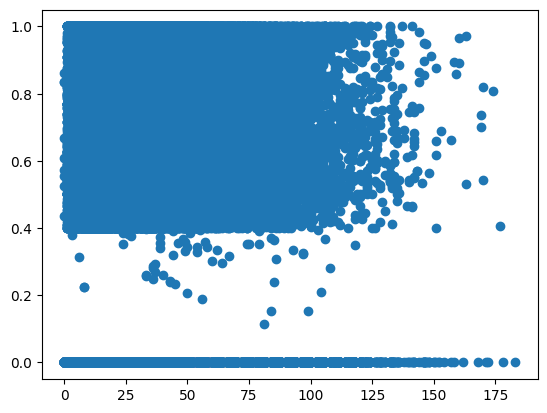

In [ ]:
#fig, axes = plt.subplots(len(a), len(b), figsize=(20,12), sharey=True)

s = df_og[df_og['Channel'] == 'Search'].sort_values(['Spend'])

plt.scatter(s['Spend'], s['CTR'])

    

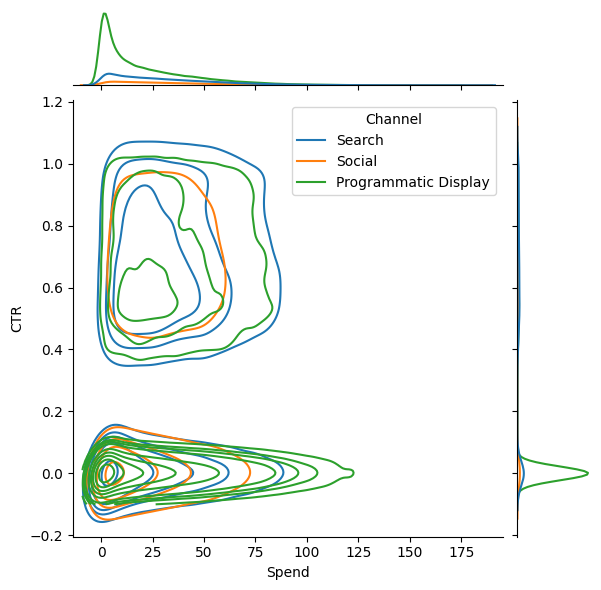

In [ ]:
sns.jointplot(x = "Spend", y="CTR", data=df_og, hue = "Channel", kind = 'kde')


Help on JointGrid in module seaborn.axisgrid object:

class JointGrid(_BaseGrid)
 |  JointGrid(data=None, *, x=None, y=None, hue=None, height=6, ratio=5, space=0.2, palette=None, hue_order=None, hue_norm=None, dropna=False, xlim=None, ylim=None, marginal_ticks=False)
 |  
 |  Grid for drawing a bivariate plot with marginal univariate plots.
 |  
 |  Many plots can be drawn by using the figure-level interface :func:`jointplot`.
 |  Use this class directly when you need more flexibility.
 |  
 |  Method resolution order:
 |      JointGrid
 |      _BaseGrid
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, *, x=None, y=None, hue=None, height=6, ratio=5, space=0.2, palette=None, hue_order=None, hue_norm=None, dropna=False, xlim=None, ylim=None, marginal_ticks=False)
 |      Set up the grid of subplots and store data internally for easy plotting.
 |      
 |      Parameters
 |      ----------
 |      data : :class:`pandas.DataFrame`, :class:`numpy.nda

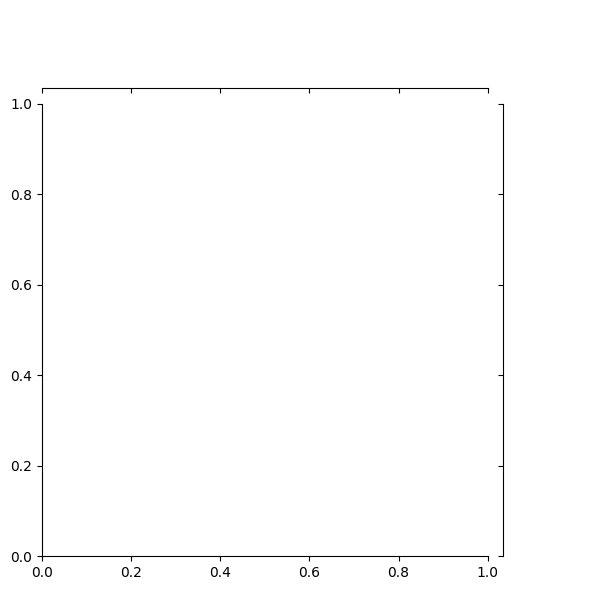

In [ ]:
help(sns.jointplot())

In [ ]:
x = df_new[[ 'Channel_Search', 
            'Channel_Social','Audience Type_Audience Type 2','Audience Type_Audience Type 3',
            'Audience Type_Audience Type 4', 'Audience Type_Audience Type 5','Spend']]
y =  df_og['CTR']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

<Axes: >

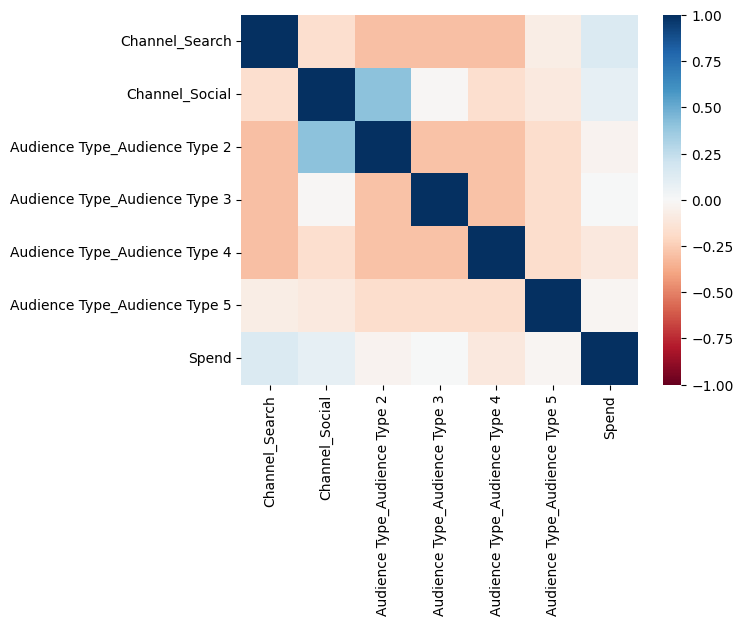

In [ ]:

sns.heatmap(x.corr(), cmap = 'RdBu', vmin = -1, vmax =1)

In [ ]:
x.corr()

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
Channel_Search,1.000000,-0.170661,-0.304444,-0.299699,-0.299964,-0.077368,0.146793
Channel_Social,-0.170661,1.000000,0.406950,-0.010283,-0.165364,-0.100035,0.093336
Audience Type_Audience Type 2,-0.304444,0.406950,1.000000,-0.294735,-0.294996,-0.178454,-0.031451
Audience Type_Audience Type 3,-0.299699,-0.010283,-0.294735,1.000000,-0.290398,-0.175673,0.007791
Audience Type_Audience Type 4,-0.299964,-0.165364,-0.294996,-0.290398,1.000000,-0.175828,-0.105330
Audience Type_Audience Type 5,-0.077368,-0.100035,-0.178454,-0.175673,-0.175828,1.000000,-0.019005
Spend,0.146793,0.093336,-0.031451,0.007791,-0.105330,-0.019005,1.000000


In [ ]:
lr.score(x, y)

0.2694896353203152

In [ ]:
x

,Goal_Consideration,Goal_Engagement,Goal_Intent to Buy,Goal_Purchase,Channel_Search,Channel_Social,Content Type_Text,Content Type_Video,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
1,0,0,1,0,1,0,1,0,0,0,0,0,25
4,0,0,1,0,1,0,1,0,0,0,0,0,10
5,0,0,1,0,1,0,1,0,0,0,0,0,9
7,0,1,0,0,1,0,1,0,0,0,0,0,6
8,0,1,0,0,1,0,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379127,0,1,0,0,1,0,1,0,0,0,0,0,12
379128,0,1,0,0,1,0,1,0,0,0,0,0,19
379136,0,1,0,0,0,0,0,1,0,1,0,0,35
379137,0,1,0,0,0,0,0,1,0,0,0,1,56


In [ ]:
df_new = pd.get_dummies(df_og, columns=['Goal', 'Channel', 'Content Type','Audience Type'], drop_first=True)

In [ ]:
df_new.head()

,Date,ID,Ad ID,Partner,Device,Group,Content ID,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC,Goal_Consideration,Goal_Engagement,Goal_Intent to Buy,Goal_Purchase,Channel_Search,Channel_Social,Content Type_Text,Content Type_Video,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
1,12/14/2022,3,921,Channel Partner 1,Computers,13.0,NaN,25,72,50,0,0,0,0,0,0,0,0.694444,2.0,0,0,1,0,1,0,1,0,0,0,0,0
4,1/11/2023,3,921,Channel Partner 1,Computers,20.0,NaN,10,6,5,0,0,0,1,0,0,0,0.833333,0.5,0,0,1,0,1,0,1,0,0,0,0,0
5,2/10/2023,3,921,Channel Partner 1,Mobile,10.0,NaN,9,537,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,1,0,1,0,1,0,0,0,0,0
7,12/26/2022,1,901,Channel Partner 1,Mobile,27.0,NaN,6,65,0,0,0,0,0,0,0,0,0.000000,0.0,0,1,0,0,1,0,1,0,0,0,0,0
8,12/29/2022,1,901,Channel Partner 1,Mobile,27.0,NaN,3,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,1,0,0,1,0,1,0,0,0,0,0


In [ ]:
x = df_new.iloc[:, -12:]

In [ ]:
x

,Goal_Consideration,Goal_Engagement,Goal_Intent to Buy,Goal_Purchase,Channel_Search,Channel_Social,Content Type_Text,Content Type_Video,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
1,0,0,1,0,1,0,1,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,0,0
5,0,0,1,0,1,0,1,0,0,0,0,0
7,0,1,0,0,1,0,1,0,0,0,0,0
8,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
379127,0,1,0,0,1,0,1,0,0,0,0,0
379128,0,1,0,0,1,0,1,0,0,0,0,0
379136,0,1,0,0,0,0,0,1,0,1,0,0
379137,0,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
avg_imp_aware = df_og.loc[df_og['Goal'] == 'Awareness', 'Impressions'].mean()

In [ ]:
avg_imp_aware

6880.713163184504

In [ ]:
std_imp_aware = df_og.loc[df_og['Goal'] == 'Awareness', 'Impressions'].std()

In [ ]:
std_imp_aware

12094.943097050758

In [ ]:
med_imp_aware = df_og.loc[df_og['Goal'] == 'Awareness', 'Impressions'].median()

In [ ]:
med_imp_aware

2346.5

In [ ]:
df_og['test_y'] = df_og.apply(lambda x: int(x['Goal'] == 'Awareness')*(( x['Clicks'] + (int(x['Channel'] == 'Programmatic Display') + 
                                                                                           int(x['Channel'] == 'Social'))*x['Video'] ) /x["Impressions"]) if x["Impressions"] != 0 else 0 , axis=1)

In [ ]:
df_og.loc[(df_og['Goal'] == 'Awareness') & (df_og['CTR'] != 0), ['CTR','test_y']].describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,8411.0,0.687369,0.164779,0.062748,0.554017,0.673401,0.821918,1.000000
test_y,8411.0,0.789225,0.282729,0.062748,0.585326,0.734222,0.915094,1.856404


In [ ]:
df_og['test_y1'] = df_og.apply(lambda x: (int(x['Goal'] == 'Consideration') + int(x['Goal'] == 'Engagement'))*(x['Clicks'] + 
                                                                            (int(x['Channel'] == 'Programmatic Display') + int(x['Channel'] == 'Social'))*x['Video'] + 
                                                                            int(x['Channel'] == "Social")*(x["Likes"] + x["Shares"])+
                                                                            x["Web"] + x["Collateral"] + x['Product'] ) /x["Impressions"] if x["Impressions"] != 0 else 0 , axis=1)   

In [ ]:
df_og

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC,test_y,test_y1
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0,0.694444,2.0,0.0,0.0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0,0.833333,0.5,0.0,0.0
5,2/10/2023,3,Intent to Buy,921,Search,Channel Partner 1,Mobile,10.0,NaN,Text,Audience Type 1,9,537,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0
7,12/26/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,6,65,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0
8,12/29/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,3,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0


In [ ]:
df_og.loc[(df_og['Goal'] == 'Consideration') | (df_og['Goal'] == 'Engagement') & (df_og['CTR'] != 0), ['CTR','test_y', 'test_y1']].describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,62906.0,0.669513,0.194738,0.0,0.541182,0.666311,0.817383,1.000000
test_y,62906.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
test_y1,62906.0,1.451604,0.615262,0.0,1.111111,1.384615,1.724153,14.347826


In [ ]:
df_og['test_y2'] = df_og.apply(lambda x: (int(x['Goal'] == 'Purchase') + int(x['Goal'] == 'Intent to Buy'))*( x['Forms'] +
                                                                            x["Web"] + x["Collateral"] + x['Product'] ) /x["Clicks"] if x["Clicks"] != 0 else x['CTR'] , axis=1)   

In [ ]:
df_og.loc[(df_og['Goal'] == 'Purchase') | (df_og['Goal'] == 'Intent to Buy') & (df_og['CTR'] != 0), ['CTR', 'test_y2']].describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,11629.0,0.705624,0.196797,0.0,0.546892,0.675676,0.880282,1.0
test_y2,11629.0,0.171542,0.420305,0.0,0.000000,0.000000,0.100000,3.0


In [ ]:
df_og['Goal'].drop_duplicates()

1       Intent to Buy
7          Engagement
15          Awareness
45      Consideration
2629         Purchase
Name: Goal, dtype: object

In [ ]:
df_og.head()

,Date,ID,Goal,Ad ID,Channel,Partner,Device,Group,Content ID,Content Type,Audience Type,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC,test_y,test_y1,test_y2
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0,0.694444,2.0,0.0,0.0,0.0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0,0.833333,0.5,0.0,0.0,0.8
5,2/10/2023,3,Intent to Buy,921,Search,Channel Partner 1,Mobile,10.0,NaN,Text,Audience Type 1,9,537,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0
7,12/26/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,6,65,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0
8,12/29/2022,1,Engagement,901,Search,Channel Partner 1,Mobile,27.0,NaN,Text,Audience Type 1,3,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
df_og['y_final'] = df_og['test_y'] + df_og['test_y1'] + df_og['test_y2']

In [ ]:
df_new = pd.get_dummies(df_og, columns=['Goal', 'Channel', 'Content Type','Audience Type'], drop_first=True)



In [ ]:
df_new.head()

,Date,ID,Ad ID,Partner,Device,Group,Content ID,Spend,Impressions,Clicks,Video,Likes,Shares,Web,Collateral,Product,Forms,CTR,CPC,test_y,test_y1,test_y2,y_final,Goal_Consideration,Goal_Engagement,Goal_Intent to Buy,Goal_Purchase,Channel_Search,Channel_Social,Content Type_Text,Content Type_Video,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5
1,12/14/2022,3,921,Channel Partner 1,Computers,13.0,NaN,25,72,50,0,0,0,0,0,0,0,0.694444,2.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0
4,1/11/2023,3,921,Channel Partner 1,Computers,20.0,NaN,10,6,5,0,0,0,1,0,0,0,0.833333,0.5,0.0,0.0,8.0,8.0,0,0,1,0,1,0,1,0,0,0,0,0
5,2/10/2023,3,921,Channel Partner 1,Mobile,10.0,NaN,9,537,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,1,0,0,0,0,0
7,12/26/2022,1,901,Channel Partner 1,Mobile,27.0,NaN,6,65,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0
8,12/29/2022,1,901,Channel Partner 1,Mobile,27.0,NaN,3,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0


(array([1.51952e+05, 5.98830e+04, 3.67610e+04, 2.02880e+04, 8.62700e+03,
        3.35700e+03, 1.17700e+03, 2.96000e+02, 7.30000e+01, 2.00000e+01]),
 array([  0. ,  18.3,  36.6,  54.9,  73.2,  91.5, 109.8, 128.1, 146.4,
        164.7, 183. ]),
 <BarContainer object of 10 artists>)

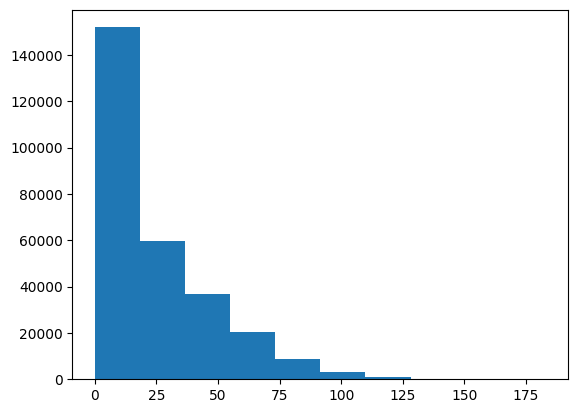

In [ ]:
plt.hist(x['Spend'])

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x = rs.fit_transform(x)

In [ ]:
x = df_new[[ 'Channel_Search', 
            'Channel_Social','Audience Type_Audience Type 2','Audience Type_Audience Type 3',
            'Audience Type_Audience Type 4', 'Audience Type_Audience Type 5','Spend']]
y =  df_og['y_final']

In [ ]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
lr.score(x, y)

0.15561425223776026

<Axes: >

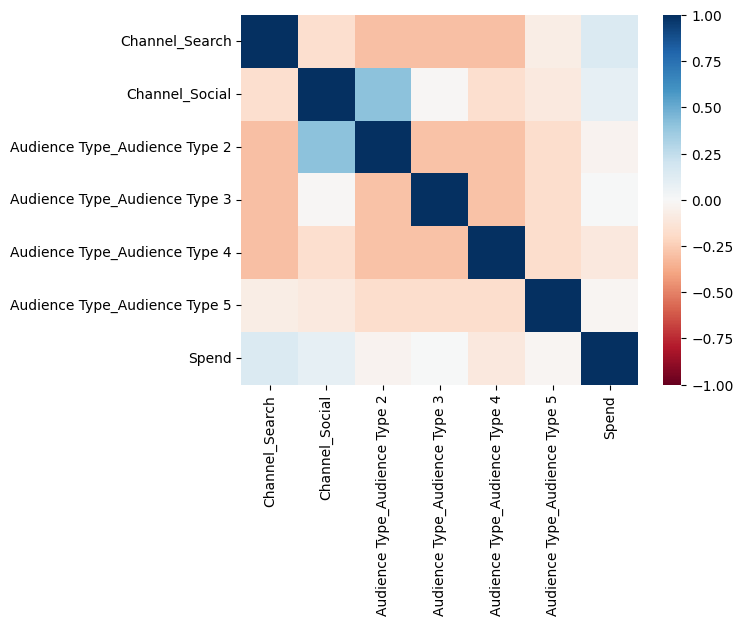

In [ ]:
sns.heatmap(x.corr(), cmap = 'RdBu', vmin = -1, vmax =1)

In [ ]:
x.corr()

,Channel_Search,Channel_Social,Audience Type_Audience Type 2,Audience Type_Audience Type 3,Audience Type_Audience Type 4,Audience Type_Audience Type 5,Spend
Channel_Search,1.000000,-0.170661,-0.304444,-0.299699,-0.299964,-0.077368,0.146793
Channel_Social,-0.170661,1.000000,0.406950,-0.010283,-0.165364,-0.100035,0.093336
Audience Type_Audience Type 2,-0.304444,0.406950,1.000000,-0.294735,-0.294996,-0.178454,-0.031451
Audience Type_Audience Type 3,-0.299699,-0.010283,-0.294735,1.000000,-0.290398,-0.175673,0.007791
Audience Type_Audience Type 4,-0.299964,-0.165364,-0.294996,-0.290398,1.000000,-0.175828,-0.105330
Audience Type_Audience Type 5,-0.077368,-0.100035,-0.178454,-0.175673,-0.175828,1.000000,-0.019005
Spend,0.146793,0.093336,-0.031451,0.007791,-0.105330,-0.019005,1.000000


In [ ]:
x

array([[ 1.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.28125],
       [ 1.     ,  0.     ,  0.     , ...,  0.     ,  0.     , -0.1875 ],
       [ 1.     ,  0.     ,  0.     , ...,  0.     ,  0.     , -0.21875],
       ...,
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     ,  0.59375],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  1.     ,  1.25   ],
       [ 0.     ,  0.     ,  0.     , ...,  0.     ,  0.     , -0.375  ]])

In [ ]:
yvar = rs.fit_transform(df_og[["Impressions", "Clicks", "Video"]]) 
yvar

array([[-0.16259527,  2.5       ,  0.        ],
       [-0.17549345,  0.25      ,  0.        ],
       [-0.07172171,  0.        ,  0.        ],
       ...,
       [ 4.46863397,  0.        ,  0.        ],
       [ 0.68692593,  0.        ,  0.        ],
       [-0.07152628,  0.        ,  0.        ]])

In [ ]:
y = np.sum(yvar, axis = 1)
y

array([ 2.33740473,  0.07450655, -0.07172171, ...,  4.46863397,
        0.68692593, -0.07152628])

In [ ]:
y.shape

(282434,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, df_og['CTR'])
lr.score(x, df_og['CTR'])

0.2694896353203152

In [ ]:
lr.coef_

array([ 0.24138876,  0.21581265, -0.08450267,  0.01291154, -0.05807735,
       -0.1071547 ,  0.11281468])

In [ ]:
var = df_og.columns.to_list()
var

['Date',
 'ID',
 'Goal',
 'Ad ID',
 'Channel',
 'Partner',
 'Device',
 'Group',
 'Content ID',
 'Content Type',
 'Audience Type',
 'Spend',
 'Impressions',
 'Clicks',
 'Video',
 'Likes',
 'Shares',
 'Web',
 'Collateral',
 'Product',
 'Forms',
 'CTR',
 'CPC',
 'test_y',
 'test_y1',
 'test_y2',
 'y_final']

In [ ]:
np.random.randint(0, 2, 16*2)

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [ ]:

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor, ExtraTreesRegressor
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
br = BaggingRegressor()
gbr = GradientBoostingRegressor()
sr = StackingRegressor()
vr = VotingRegressor()
etr = ExtraTreesRegressor()

models = {"RFR" : rfr, abr, br, gbr, sr, vr, etr]



RandomForestRegressor()

In [ ]:
for m in models: 
    for v in var:
        m.fit(x, df_og[v])
        score = m.score(x, df_og[v])
        print()



In [ ]:
rfr.

0

In [ ]:


rfr.fit(x, df_og['Impressions'])
rfr.score(x, df_og['Impressions'])

0.473387936404994